# 데이터 불러오기

In [2371]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [2372]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/본 프로젝트


In [2373]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [2374]:
# import pandas as pd
# # 이상치 확인
# def find_outliers_iqr(data, k=1.5):
#     q1 = data.quantile(0.25)
#     q3 = data.quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - k * iqr
#     upper_bound = q3 + k * iqr
#     outliers = data[(data < lower_bound) | (data > upper_bound)]
#     return outliers

# # 각 변수에 대한 이상치 찾기
# variables = ['총_점포수', '순점포증감률', '총_매출_금액', '분기당_매출_금액']
# outliers_df = pd.DataFrame()

# for var in variables:
#     outliers = find_outliers_iqr(df[var])
#     temp_df = df.loc[outliers.index]
#     temp_df['OutlierVariable'] = var
#     outliers_df = pd.concat([outliers_df, temp_df])

# print(outliers_df)

In [2375]:
# # 이상치 제거
# def remove_outliers_iqr(data, k=1.5):
#     q1 = data.quantile(0.25)
#     q3 = data.quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - k * iqr
#     upper_bound = q3 + k * iqr
#     filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
#     return filtered_data

# # 각 변수에 대한 이상치 제거
# filtered_df = df.copy()
# variables = ['총_점포수', '순점포증감률', '총_매출_금액', '분기당_매출_금액']
# for var in variables:
#     filtered_df[var] = remove_outliers_iqr(df[var])

# # 이상치가 제거된 행만 남기기
# filtered_df.dropna(inplace=True)

In [2376]:
# df = filtered_df.reset_index().drop('index', axis=1)
# df

In [2377]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [2378]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [2379]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [2380]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


# # 소매 카테고리만 남기기
# df_sin_sell_quarter = df_sin_quarter[df_sin_quarter.대분류 == '소매'].reset_index().drop('index', axis=1)


# # 서비스 카테고리만 남기기
# df_sin_service_quarter = df_sin_quarter[df_sin_quarter.대분류 == '서비스'].reset_index().drop('index', axis=1)


# # 외식 카테고리만 남기기
# df_sin_food_quarter = df_sin_quarter[df_sin_quarter.대분류 == '외식'].reset_index().drop('index', axis=1)

# # df_sin_food_quarter

<ipython-input-2380-1b79066c5732>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


# 한식음식점

In [2381]:
# 한식만 남기기
sin_kfood = df_sin_quarter[df_sin_quarter.업종명 == '한식음식점'].reset_index().drop('index', axis=1)
sin_kfood

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,식사류,한식음식점,신촌동,34974328196,540,11,20
1,2017-2,외식,식사류,한식음식점,신촌동,35821251882,535,16,21
2,2017-3,외식,식사류,한식음식점,신촌동,34372357455,529,14,20
3,2017-4,외식,식사류,한식음식점,신촌동,37190081157,519,14,24
4,2018-1,외식,식사류,한식음식점,신촌동,34866478691,512,11,18
5,2018-2,외식,식사류,한식음식점,신촌동,37268133585,504,12,20
6,2018-3,외식,식사류,한식음식점,신촌동,35007030665,502,19,21
7,2018-4,외식,식사류,한식음식점,신촌동,38844032862,505,27,24
8,2019-1,외식,식사류,한식음식점,신촌동,30832380519,502,16,19
9,2019-2,외식,식사류,한식음식점,신촌동,28065421928,503,20,19


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [2382]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_kfood['성장성'] = sin_kfood['분기당_매출_금액'] / sin_kfood['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_kfood['성장성'][0] = 1

sin_kfood

<ipython-input-2382-5d914839edec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_kfood['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,외식,식사류,한식음식점,신촌동,34974328196,540,11,20,1.000000
1,2017-2,외식,식사류,한식음식점,신촌동,35821251882,535,16,21,1.024216
2,2017-3,외식,식사류,한식음식점,신촌동,34372357455,529,14,20,0.959552
3,2017-4,외식,식사류,한식음식점,신촌동,37190081157,519,14,24,1.081976
4,2018-1,외식,식사류,한식음식점,신촌동,34866478691,512,11,18,0.937521
5,2018-2,외식,식사류,한식음식점,신촌동,37268133585,504,12,20,1.068881
6,2018-3,외식,식사류,한식음식점,신촌동,35007030665,502,19,21,0.939329
7,2018-4,외식,식사류,한식음식점,신촌동,38844032862,505,27,24,1.109607
8,2019-1,외식,식사류,한식음식점,신촌동,30832380519,502,16,19,0.793748
9,2019-2,외식,식사류,한식음식점,신촌동,28065421928,503,20,19,0.910258


In [2383]:
# 개업률, 폐업률, 순점포증감률 추가

sin_kfood['개업률'] = (sin_kfood['개업점포수'] / sin_kfood['총 점포수']) * 100
sin_kfood['폐업률'] = (sin_kfood['폐업점포수'] / sin_kfood['총 점포수']) * 100
sin_kfood['순점포증감률'] = ((sin_kfood['개업점포수'] - sin_kfood['폐업점포수']) / sin_kfood['총 점포수']) * 100

# sin_kfood

In [2384]:
# # 안정성 추가
# # 점포수 변동의 민감도를 판단하기 위해 기초구역 단위별, 선택 업종의 점포수 변화량을 산출하여 안정 정도를 판단
# # 안정성 = 1 - (폐업 점포수 / 신규 점포수).  신규 점포수는 개업 점포수로 한다.

# sin_food_quarter['안정성'] = 1 - (sin_food_quarter['폐업점포수']/sin_food_quarter['개업점포수'])
# # sin_food_quarter

In [2385]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 한식만 남기기
seo_kfood = df_seo_quarter[df_seo_quarter['업종명'] == '한식음식점'].reset_index()

################################################################################################################################################################################################

sin_kfood['시장성'] = (sin_kfood['분기당_매출_금액'] / sin_kfood['총 점포수']) - (seo_kfood['분기당_매출_금액'] / seo_kfood['총 점포수'])

sin_kfood = sin_kfood[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_kfood

<ipython-input-2385-072b1fca34d0>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한식음식점,34974328196,1.000000,-1.666667,9.888987e+06
1,2017-2,한식음식점,35821251882,1.024216,-0.934579,8.089225e+06
2,2017-3,한식음식점,34372357455,0.959552,-1.134216,8.228848e+06
3,2017-4,한식음식점,37190081157,1.081976,-1.926782,1.281840e+07
4,2018-1,한식음식점,34866478691,0.937521,-1.367188,1.219852e+07
5,2018-2,한식음식점,37268133585,1.068881,-1.587302,1.164436e+07
6,2018-3,한식음식점,35007030665,0.939329,-0.398406,9.084005e+06
7,2018-4,한식음식점,38844032862,1.109607,0.594059,1.166196e+07
8,2019-1,한식음식점,30832380519,0.793748,-0.597610,7.480764e+06
9,2019-2,한식음식점,28065421928,0.910258,0.198807,2.465817e+06


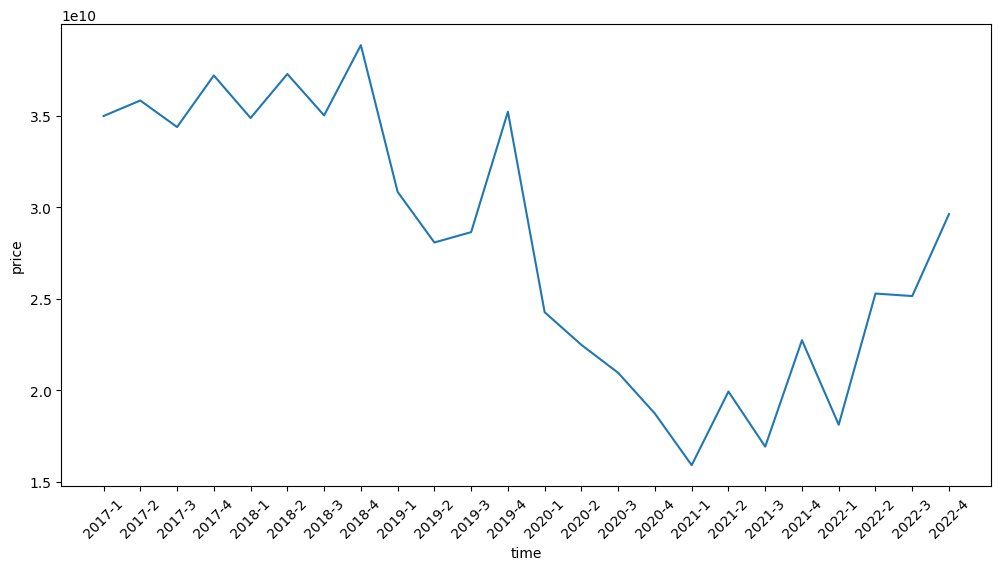

In [2386]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_kfood['분기'], y=sin_kfood['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [2387]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_kfood[['성장성', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  9.888987e+06 -1.666667
1   1.024216  8.089225e+06 -0.934579
2   0.959552  8.228848e+06 -1.134216
3   1.081976  1.281840e+07 -1.926782
4   0.937521  1.219852e+07 -1.367188
5   1.068881  1.164436e+07 -1.587302
6   0.939329  9.084005e+06 -0.398406
7   1.109607  1.166196e+07  0.594059
8   0.793748  7.480764e+06 -0.597610
9   0.910258  2.465817e+06  0.198807
10  1.020132  2.391899e+06 -1.821862
11  1.229773  8.391643e+06  0.000000
12  0.688926  1.194518e+06  0.202020
13  0.926429 -4.465314e+06  0.595238
14  0.932056 -3.148021e+06 -1.818182
15  0.893598 -2.674388e+06 -2.922756
16  0.849551 -3.723169e+06  0.208333
17  1.253011 -4.116171e+06 -0.208768
18  0.848968 -3.361714e+06 -0.420168
19  1.343593  1.243884e+06 -4.166667
20  0.796924 -1.357481e+06  1.082251
21  1.395605 -1.210761e+06  0.000000
22  0.994572  7.241517e+05 -2.968037
23  1.178176  4.061459e+06 -0.919540
---------------------------------------------------------------------------

In [2388]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [2389]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [2390]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms,2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [2391]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.43250994 0.30025178 0.22835758]
 [0.69232381 0.49334149 0.6186278 ]]


In [2392]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2393]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))
# model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer, activation='tanh'))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_342 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_343 (LSTM)             (None, 32)                12416     
                                                                 
 dense_171 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2394]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7126
Epoch 1: val_loss improved from inf to 0.04850, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.7126 - val_loss: 0.0485
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6897
Epoch 2: val_loss improved from 0.04850 to 0.04447, saving model to stock_model.h5
1/1 [==============================] - 0s 141ms/step - loss: 0.6897 - val_loss: 0.0445
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6677
Epoch 3: val_loss improved from 0.04447 to 0.04072, saving model to stock_model.h5
1/1 [==============================] - 0s 128ms/step - loss: 0.6677 - val_loss: 0.0407
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6464
Epoch 4: val_loss improved from 0.04072 to 0.03723, saving model to stock_model.h5
1/1 [==============================] - 0s 146ms/step - loss: 0.6464 - val_loss: 0.0372
Epoch 5/100
1/1 [==============

In [2395]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 832ms/step
[[0.19072825]
 [0.16749236]
 [0.1769309 ]
 [0.21056458]
 [0.19780013]]


In [2396]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.297497,0.190728
2022-1,0.096345,0.167492
2022-2,0.408625,0.176931
2022-3,0.402645,0.210565
2022-4,0.597868,0.197800


In [2397]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_kfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.297497,0.190728,22726166947,2.027651e+10,2.449658e+09
2022-1,0.096345,0.167492,18111018888,1.974340e+10,-1.632379e+09
2022-2,0.408625,0.176931,25275820262,1.995995e+10,5.315871e+09
2022-3,0.402645,0.210565,25138614612,2.073163e+10,4.406989e+09
2022-4,0.597868,0.197800,29617724330,2.043876e+10,9.178961e+09


In [2398]:
df_test = df_test.reset_index()

### 결과

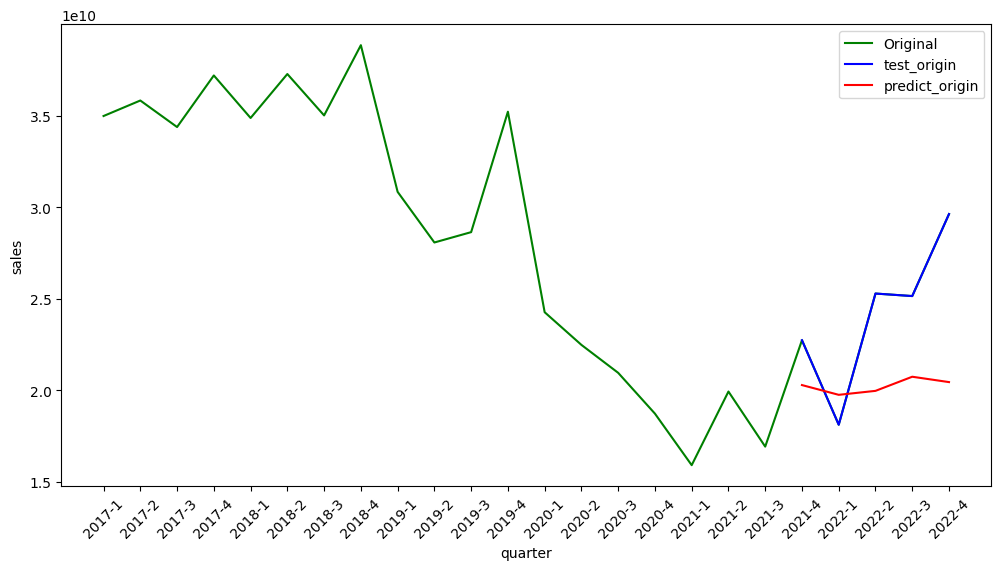

In [2399]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [2400]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     3.943820e+09
std      3.963277e+09
min     -1.632379e+09
25%      2.449658e+09
50%      4.406989e+09
75%      5.315871e+09
max      9.178961e+09
dtype: float64

In [2401]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.17713442]]
--------------------------------------------------------------------------------
예측된 매출  : 19964620800.0 


## 23년 1분기 성장성 예측

In [2402]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      분기당_매출_금액           시장성    순점포증감률
0   34974328196  9.888987e+06 -1.666667
1   35821251882  8.089225e+06 -0.934579
2   34372357455  8.228848e+06 -1.134216
3   37190081157  1.281840e+07 -1.926782
4   34866478691  1.219852e+07 -1.367188
5   37268133585  1.164436e+07 -1.587302
6   35007030665  9.084005e+06 -0.398406
7   38844032862  1.166196e+07  0.594059
8   30832380519  7.480764e+06 -0.597610
9   28065421928  2.465817e+06  0.198807
10  28630447687  2.391899e+06 -1.821862
11  35208945096  8.391643e+06  0.000000
12  24256368247  1.194518e+06  0.202020
13  22471797507 -4.465314e+06  0.595238
14  20944976800 -3.148021e+06 -1.818182
15  18716395967 -2.674388e+06 -2.922756
16  15900536691 -3.723169e+06  0.208333
17  19923552401 -4.116171e+06 -0.208768
18  16914468311 -3.361714e+06 -0.420168
19  22726166947  1.243884e+06 -4.166667
20  18111018888 -1.357481e+06  1.082251
21  25275820262 -1.210761e+06  0.000000
22  25138614612  7.241517e+05 -2.968037
23  29617724330  4.061459e+06 -0.919540


In [2403]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [2404]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [2405]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.40264473 0.30025178 0.22835758]
 [0.59786824 0.49334149 0.6186278 ]]


In [2406]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2407]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_344 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_345 (LSTM)             (None, 32)                12416     
                                                                 
 dense_172 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2408]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2655
Epoch 1: val_loss improved from inf to 0.15348, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2655 - val_loss: 0.1535
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2509
Epoch 2: val_loss improved from 0.15348 to 0.14716, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.2509 - val_loss: 0.1472
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2370
Epoch 3: val_loss improved from 0.14716 to 0.14114, saving model to stock_model.h5
1/1 [==============================] - 0s 134ms/step - loss: 0.2370 - val_loss: 0.1411
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2238
Epoch 4: val_loss improved from 0.14114 to 0.13541, saving model to stock_model.h5
1/1 [==============================] - 0s 124ms/step - loss: 0.2238 - val_loss: 0.1354
Epoch 5/100
1/1 [==============

In [2409]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 832ms/step
[[0.25523633]
 [0.22729585]
 [0.23664328]
 [0.30204725]
 [0.28465918]]


In [2410]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.926400,0.255236
2022-1,0.152824,0.227296
2022-2,1.000000,0.236643
2022-3,0.432510,0.302047
2022-4,0.692324,0.284659


In [2411]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 3].values       # 성장성이 sin_kfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.926400,0.255236,1.343593,0.869296,0.474297
2022-1,0.152824,0.227296,0.796924,0.849551,-0.052628
2022-2,1.000000,0.236643,1.395605,0.856157,0.539448
2022-3,0.432510,0.302047,0.994572,0.902377,0.092195
2022-4,0.692324,0.284659,1.178176,0.890089,0.288088


### 결과

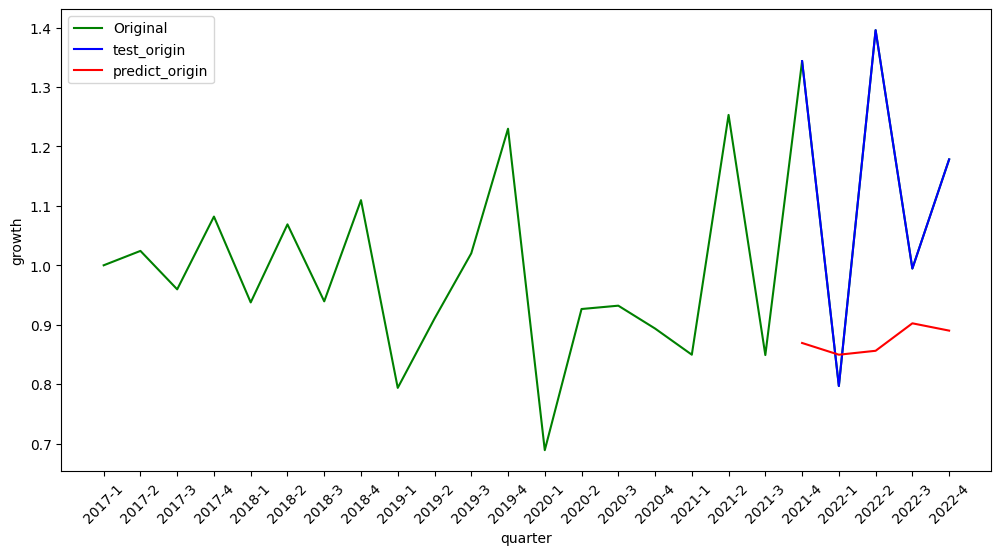

In [2412]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [2413]:
## error의 요약 통계량
error.describe()

count    5.000000
mean     0.268280
std      0.250177
min     -0.052628
25%      0.092195
50%      0.288088
75%      0.474297
max      0.539448
dtype: float64

In [2414]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.2746539]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8830182552337646 


## 23년 1분기 시장성 예측

In [2415]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_kfood[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_kfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액    순점포증감률
0   1.000000  34974328196 -1.666667
1   1.024216  35821251882 -0.934579
2   0.959552  34372357455 -1.134216
3   1.081976  37190081157 -1.926782
4   0.937521  34866478691 -1.367188
5   1.068881  37268133585 -1.587302
6   0.939329  35007030665 -0.398406
7   1.109607  38844032862  0.594059
8   0.793748  30832380519 -0.597610
9   0.910258  28065421928  0.198807
10  1.020132  28630447687 -1.821862
11  1.229773  35208945096  0.000000
12  0.688926  24256368247  0.202020
13  0.926429  22471797507  0.595238
14  0.932056  20944976800 -1.818182
15  0.893598  18716395967 -2.922756
16  0.849551  15900536691  0.208333
17  1.253011  19923552401 -0.208768
18  0.848968  16914468311 -0.420168
19  1.343593  22726166947 -4.166667
20  0.796924  18111018888  1.082251
21  1.395605  25275820262  0.000000
22  0.994572  25138614612 -2.968037
23  1.178176  29617724330 -0.919540
--------------------------------------------------------------------------------
             시장성
0 

In [2416]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [2417]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [2418]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.43250994 0.40264473 0.22835758]
 [0.69232381 0.59786824 0.6186278 ]]


In [2419]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2420]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_346 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_347 (LSTM)             (None, 32)                12416     
                                                                 
 dense_173 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2421]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6818
Epoch 1: val_loss improved from inf to 0.02152, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.6818 - val_loss: 0.0215
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6596
Epoch 2: val_loss improved from 0.02152 to 0.01923, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.6596 - val_loss: 0.0192
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6381
Epoch 3: val_loss improved from 0.01923 to 0.01723, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.6381 - val_loss: 0.0172
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6174
Epoch 4: val_loss improved from 0.01723 to 0.01549, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.6174 - val_loss: 0.0155
Epoch 5/100
1/1 [=================

In [2422]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 821ms/step
[[0.10239471]
 [0.08645764]
 [0.0907044 ]
 [0.10843455]
 [0.10517769]]


In [2423]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.330322,0.102395
2022-1,0.179813,0.086458
2022-2,0.188302,0.090704
2022-3,0.300252,0.108435
2022-4,0.493341,0.105178


In [2424]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 5].values       # 시장성이 sin_kfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.330322,0.102395,1.243884e+06,-2695553.25,3.939437e+06
2022-1,0.179813,0.086458,-1.357481e+06,-2971005.00,1.613524e+06
2022-2,0.188302,0.090704,-1.210761e+06,-2897605.00,1.686844e+06
2022-3,0.300252,0.108435,7.241517e+05,-2591162.25,3.315314e+06
2022-4,0.493341,0.105178,4.061459e+06,-2647452.75,6.708912e+06


### 결과

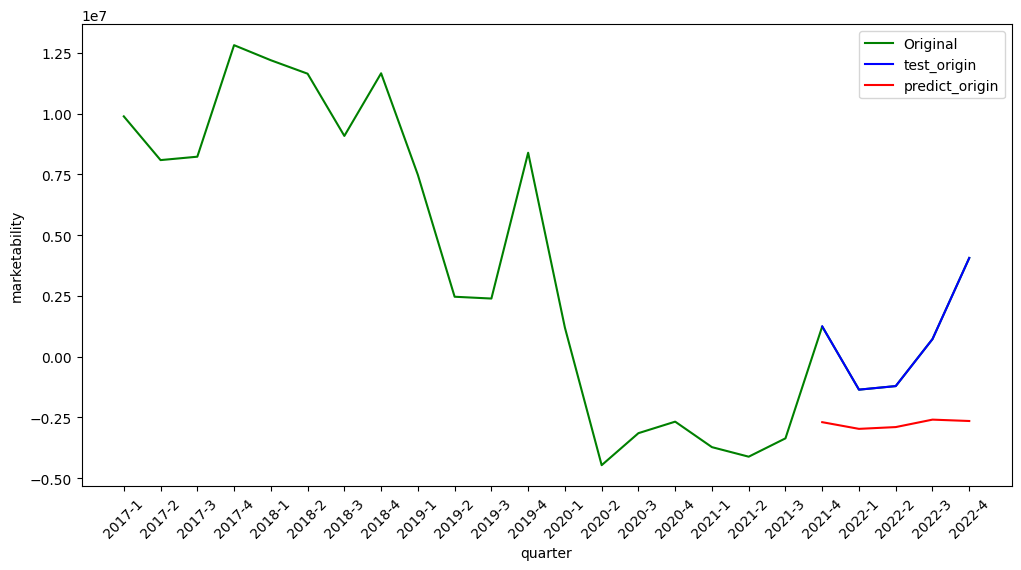

In [2425]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [2426]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     3.452806e+06
std      2.083238e+06
min      1.613524e+06
25%      1.686844e+06
50%      3.315314e+06
75%      3.939437e+06
max      6.708912e+06
dtype: float64

In [2427]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.09264876]]
--------------------------------------------------------------------------------
예측된 시장성  : -2863999.5 


## 23년 1분기 순점포증감률 예측

In [2428]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = sin_kfood[['성장성', '분기당_매출_금액', '시장성']]
y = sin_kfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액           시장성
0   1.000000  34974328196  9.888987e+06
1   1.024216  35821251882  8.089225e+06
2   0.959552  34372357455  8.228848e+06
3   1.081976  37190081157  1.281840e+07
4   0.937521  34866478691  1.219852e+07
5   1.068881  37268133585  1.164436e+07
6   0.939329  35007030665  9.084005e+06
7   1.109607  38844032862  1.166196e+07
8   0.793748  30832380519  7.480764e+06
9   0.910258  28065421928  2.465817e+06
10  1.020132  28630447687  2.391899e+06
11  1.229773  35208945096  8.391643e+06
12  0.688926  24256368247  1.194518e+06
13  0.926429  22471797507 -4.465314e+06
14  0.932056  20944976800 -3.148021e+06
15  0.893598  18716395967 -2.674388e+06
16  0.849551  15900536691 -3.723169e+06
17  1.253011  19923552401 -4.116171e+06
18  0.848968  16914468311 -3.361714e+06
19  1.343593  22726166947  1.243884e+06
20  0.796924  18111018888 -1.357481e+06
21  1.395605  25275820262 -1.210761e+06
22  0.994572  25138614612  7.241517e+05
23  1.178176  29617724330  4.061459e+06


In [2429]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [2430]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [2431]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.43250994 0.40264473 0.30025178]
 [0.69232381 0.59786824 0.49334149]]


In [2432]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2433]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_348 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_349 (LSTM)             (None, 32)                12416     
                                                                 
 dense_174 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2434]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4922
Epoch 1: val_loss improved from inf to 0.51972, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.4922 - val_loss: 0.5197
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4721
Epoch 2: val_loss improved from 0.51972 to 0.50712, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.4721 - val_loss: 0.5071
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4527
Epoch 3: val_loss improved from 0.50712 to 0.49486, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4527 - val_loss: 0.4949
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4340
Epoch 4: val_loss improved from 0.49486 to 0.48287, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.4340 - val_loss: 0.4829
Epoch 5/100
1/1 [=================

In [2435]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 844ms/step
[[0.3737903 ]
 [0.3857304 ]
 [0.48278764]
 [0.40659416]
 [0.52653474]]


In [2436]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.000000,0.373790
2022-1,1.000000,0.385730
2022-2,0.793814,0.482788
2022-3,0.228358,0.406594
2022-4,0.618628,0.526535


In [2437]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_kfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.000000,0.373790,-4.166667,-2.204672,-1.961995
2022-1,1.000000,0.385730,1.082251,-2.141999,3.224251
2022-2,0.793814,0.482788,0.000000,-1.632554,1.632554
2022-3,0.228358,0.406594,-2.968037,-2.032487,-0.935549
2022-4,0.618628,0.526535,-0.919540,-1.402929,0.483389


### 결과

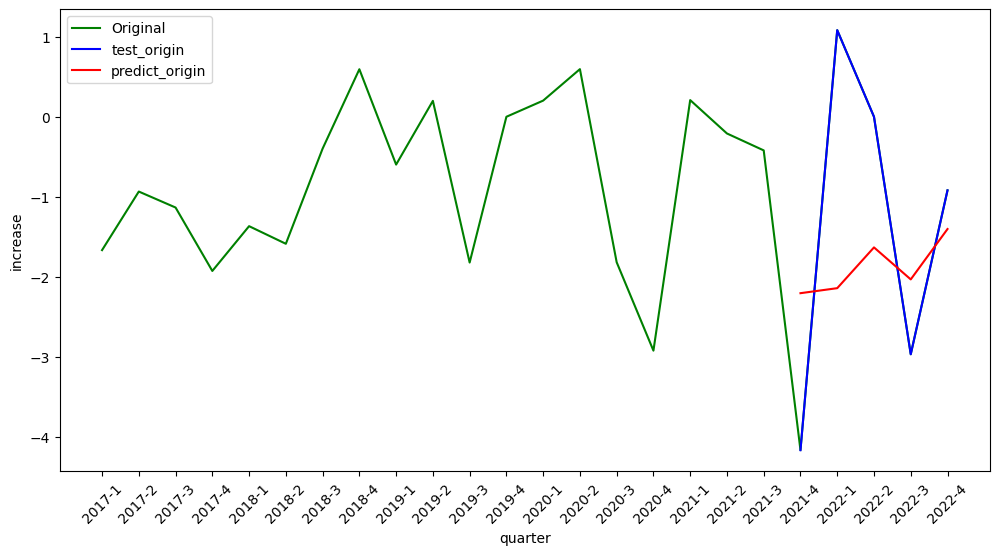

In [2438]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [2439]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.488530
std      2.050979
min     -1.961995
25%     -0.935549
50%      0.483389
75%      1.632554
max      3.224251
dtype: float64

In [2440]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 26ms/step
[[0.54041505]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.3300724029541016 


## 원본 데이터에 예측값 추가하기

In [2441]:
print(sales)
print(growth)
print(marketability)
print(increase)

19964620000.0
0.88301826
-2863999.5
-1.3300724


In [2442]:
sin_kfood.loc[24] = ['2023-1', '한식음식점', sales, growth, increase, marketability]

<ipython-input-2442-e406815b1874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_kfood.loc[24] = ['2023-1', '한식음식점', sales, growth, increase, marketability]


In [2443]:
sin_kfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한식음식점,3.497433e+10,1.000000,-1.666667,9.888987e+06
1,2017-2,한식음식점,3.582125e+10,1.024216,-0.934579,8.089225e+06
2,2017-3,한식음식점,3.437236e+10,0.959552,-1.134216,8.228848e+06
3,2017-4,한식음식점,3.719008e+10,1.081976,-1.926782,1.281840e+07
4,2018-1,한식음식점,3.486648e+10,0.937521,-1.367188,1.219852e+07
5,2018-2,한식음식점,3.726813e+10,1.068881,-1.587302,1.164436e+07
6,2018-3,한식음식점,3.500703e+10,0.939329,-0.398406,9.084005e+06
7,2018-4,한식음식점,3.884403e+10,1.109607,0.594059,1.166196e+07
8,2019-1,한식음식점,3.083238e+10,0.793748,-0.597610,7.480764e+06
9,2019-2,한식음식점,2.806542e+10,0.910258,0.198807,2.465817e+06


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [2444]:
### X / y 데이터 생성
X = sin_kfood[['성장성', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  9.888987e+06 -1.666667
1   1.024216  8.089225e+06 -0.934579
2   0.959552  8.228848e+06 -1.134216
3   1.081976  1.281840e+07 -1.926782
4   0.937521  1.219852e+07 -1.367188
5   1.068881  1.164436e+07 -1.587302
6   0.939329  9.084005e+06 -0.398406
7   1.109607  1.166196e+07  0.594059
8   0.793748  7.480764e+06 -0.597610
9   0.910258  2.465817e+06  0.198807
10  1.020132  2.391899e+06 -1.821862
11  1.229773  8.391643e+06  0.000000
12  0.688926  1.194518e+06  0.202020
13  0.926429 -4.465314e+06  0.595238
14  0.932056 -3.148021e+06 -1.818182
15  0.893598 -2.674388e+06 -2.922756
16  0.849551 -3.723169e+06  0.208333
17  1.253011 -4.116171e+06 -0.208768
18  0.848968 -3.361714e+06 -0.420168
19  1.343593  1.243884e+06 -4.166667
20  0.796924 -1.357481e+06  1.082251
21  1.395605 -1.210761e+06  0.000000
22  0.994572  7.241517e+05 -2.968037
23  1.178176  4.061459e+06 -0.919540
24  0.883018 -2.864000e+06 -1.330072
--------------------------------------

In [2445]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [2446]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.69232381 0.49334149 0.6186278 ]
 [0.27465393 0.09264875 0.54041507]]


In [2447]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2448]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_350 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_351 (LSTM)             (None, 32)                12416     
                                                                 
 dense_175 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2449]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7126
Epoch 1: val_loss improved from inf to 0.05367, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.7126 - val_loss: 0.0537
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6897
Epoch 2: val_loss improved from 0.05367 to 0.04938, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.6897 - val_loss: 0.0494
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6677
Epoch 3: val_loss improved from 0.04938 to 0.04536, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.6677 - val_loss: 0.0454
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6464
Epoch 4: val_loss improved from 0.04536 to 0.04161, saving model to stock_model.h5
1/1 [==============================] - 0s 104ms/step - loss: 0.6464 - val_loss: 0.0416
Epoch 5/100
1/1 [================

In [2450]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 807ms/step
[[0.18078494]
 [0.19104515]
 [0.22752571]
 [0.21399136]
 [0.19151816]]


In [2451]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.096345,0.180785
2022-2,0.408625,0.191045
2022-3,0.402645,0.227526
2022-4,0.597868,0.213991
2023-1,0.177134,0.191518


In [2452]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_kfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.096345,0.180785,1.811102e+10,2.004838e+10,-1.937357e+09
2022-2,0.408625,0.191045,2.527582e+10,2.028378e+10,4.992039e+09
2022-3,0.402645,0.227526,2.513861e+10,2.112077e+10,4.017843e+09
2022-4,0.597868,0.213991,2.961772e+10,2.081025e+10,8.807478e+09
2023-1,0.177134,0.191518,1.996462e+10,2.029463e+10,-3.300127e+08


In [2453]:
df_test = df_test.reset_index()

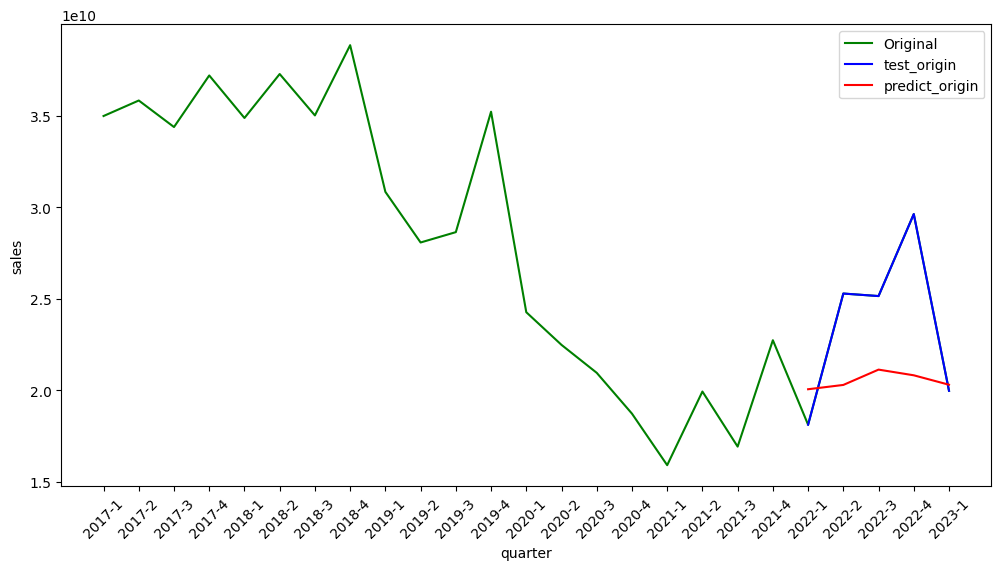

In [2454]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [2455]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     3.109998e+09
std      4.305142e+09
min     -1.937357e+09
25%     -3.300127e+08
50%      4.017843e+09
75%      4.992039e+09
max      8.807478e+09
dtype: float64

In [2456]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.21270622]]
--------------------------------------------------------------------------------
예측된 매출  : 20780761088.0 


### 성장성

In [2457]:
### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.497433e+10  9.888987e+06 -1.666667
1   3.582125e+10  8.089225e+06 -0.934579
2   3.437236e+10  8.228848e+06 -1.134216
3   3.719008e+10  1.281840e+07 -1.926782
4   3.486648e+10  1.219852e+07 -1.367188
5   3.726813e+10  1.164436e+07 -1.587302
6   3.500703e+10  9.084005e+06 -0.398406
7   3.884403e+10  1.166196e+07  0.594059
8   3.083238e+10  7.480764e+06 -0.597610
9   2.806542e+10  2.465817e+06  0.198807
10  2.863045e+10  2.391899e+06 -1.821862
11  3.520895e+10  8.391643e+06  0.000000
12  2.425637e+10  1.194518e+06  0.202020
13  2.247180e+10 -4.465314e+06  0.595238
14  2.094498e+10 -3.148021e+06 -1.818182
15  1.871640e+10 -2.674388e+06 -2.922756
16  1.590054e+10 -3.723169e+06  0.208333
17  1.992355e+10 -4.116171e+06 -0.208768
18  1.691447e+10 -3.361714e+06 -0.420168
19  2.272617e+10  1.243884e+06 -4.166667
20  1.811102e+10 -1.357481e+06  1.082251
21  2.527582e+10 -1.210761e+06  0.000000
22  2.513861e+10  7.241517e+05 -2.968037
23  2.961772e+10

In [2458]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [2459]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.59786824 0.49334149 0.6186278 ]
 [0.17713447 0.09264875 0.54041507]]


In [2460]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2461]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_352 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_353 (LSTM)             (None, 32)                12416     
                                                                 
 dense_176 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2462]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2655
Epoch 1: val_loss improved from inf to 0.24162, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.2655 - val_loss: 0.2416
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2509
Epoch 2: val_loss improved from 0.24162 to 0.23395, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2509 - val_loss: 0.2339
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2370
Epoch 3: val_loss improved from 0.23395 to 0.22659, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2370 - val_loss: 0.2266
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2238
Epoch 4: val_loss improved from 0.22659 to 0.21952, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2238 - val_loss: 0.2195
Epoch 5/100
1/1 [=================

In [2463]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 825ms/step
[[0.2792195 ]
 [0.2897437 ]
 [0.3733825 ]
 [0.35243732]
 [0.3387224 ]]


In [2464]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.152824,0.279220
2022-2,1.000000,0.289744
2022-3,0.432510,0.373383
2022-4,0.692324,0.352437
2023-1,0.274654,0.338722


In [2465]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 3].values       # 성장성이 sin_kfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.152824,0.279220,0.796924,0.886245,-0.089321
2022-2,1.000000,0.289744,1.395605,0.893682,0.501923
2022-3,0.432510,0.373383,0.994572,0.952788,0.041784
2022-4,0.692324,0.352437,1.178176,0.937986,0.240190
2023-1,0.274654,0.338722,0.883018,0.928294,-0.045276


In [2466]:
df_test = df_test.reset_index()

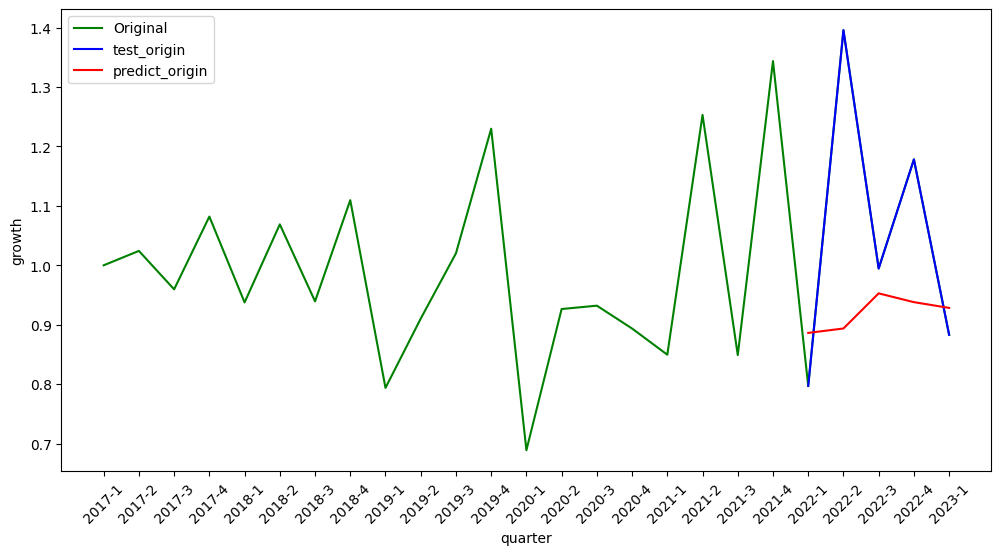

In [2467]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [2468]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.129860
std      0.243451
min     -0.089321
25%     -0.045276
50%      0.041784
75%      0.240190
max      0.501923
dtype: float64

In [2469]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 24ms/step
[[0.3744415]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9535359740257263 


### 시장성

In [2470]:
### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_kfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.497433e+10  1.000000 -1.666667
1   3.582125e+10  1.024216 -0.934579
2   3.437236e+10  0.959552 -1.134216
3   3.719008e+10  1.081976 -1.926782
4   3.486648e+10  0.937521 -1.367188
5   3.726813e+10  1.068881 -1.587302
6   3.500703e+10  0.939329 -0.398406
7   3.884403e+10  1.109607  0.594059
8   3.083238e+10  0.793748 -0.597610
9   2.806542e+10  0.910258  0.198807
10  2.863045e+10  1.020132 -1.821862
11  3.520895e+10  1.229773  0.000000
12  2.425637e+10  0.688926  0.202020
13  2.247180e+10  0.926429  0.595238
14  2.094498e+10  0.932056 -1.818182
15  1.871640e+10  0.893598 -2.922756
16  1.590054e+10  0.849551  0.208333
17  1.992355e+10  1.253011 -0.208768
18  1.691447e+10  0.848968 -0.420168
19  2.272617e+10  1.343593 -4.166667
20  1.811102e+10  0.796924  1.082251
21  2.527582e+10  1.395605  0.000000
22  2.513861e+10  0.994572 -2.968037
23  2.961772e+10  1.178176 -0.919540
24  1.996462e+10  0.883018 -1.330072
--------------------------------------

In [2471]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [2472]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.59786824 0.69232381 0.6186278 ]
 [0.17713447 0.27465393 0.54041507]]


In [2473]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2474]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_354 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_355 (LSTM)             (None, 32)                12416     
                                                                 
 dense_177 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2475]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6617
Epoch 1: val_loss improved from inf to 0.03415, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.6617 - val_loss: 0.0342
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6402
Epoch 2: val_loss improved from 0.03415 to 0.03117, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.6402 - val_loss: 0.0312
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6193
Epoch 3: val_loss improved from 0.03117 to 0.02845, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.6193 - val_loss: 0.0285
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5990
Epoch 4: val_loss improved from 0.02845 to 0.02600, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.5990 - val_loss: 0.0260
Epoch 5/100
1/1 [==============

In [2476]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 817ms/step
[[0.10123555]
 [0.10635917]
 [0.13165283]
 [0.12814091]
 [0.11994774]]


In [2477]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.179813,0.101236
2022-2,0.188302,0.106359
2022-3,0.300252,0.131653
2022-4,0.493341,0.128141
2023-1,0.092649,0.119948


In [2478]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 5].values       # 시장성이 sin_kfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.179813,0.101236,-1.357481e+06,-2715587.75,1.358107e+06
2022-2,0.188302,0.106359,-1.210761e+06,-2627032.75,1.416271e+06
2022-3,0.300252,0.131653,7.241517e+05,-2189864.25,2.914016e+06
2022-4,0.493341,0.128141,4.061459e+06,-2250563.25,6.312022e+06
2023-1,0.092649,0.119948,-2.864000e+06,-2392171.50,-4.718280e+05


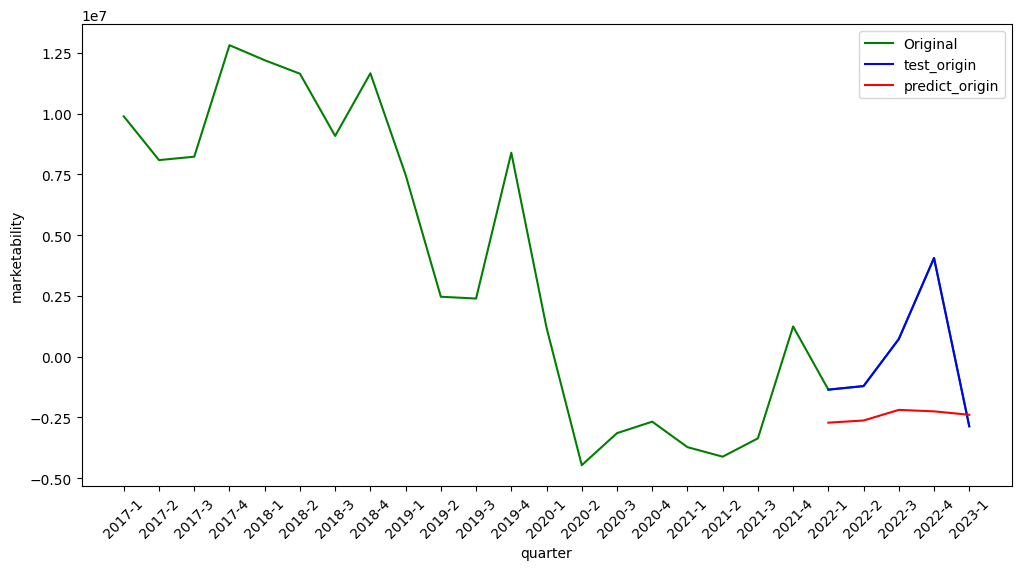

In [2479]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [2480]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     2.305718e+06
std      2.540883e+06
min     -4.718280e+05
25%      1.358107e+06
50%      1.416271e+06
75%      2.914016e+06
max      6.312022e+06
dtype: float64

In [2481]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 32ms/step
[[0.13043971]]
--------------------------------------------------------------------------------
예측된 시장성  : -2210831.5 


### 순점포증감률

In [2482]:
### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '성장성', '시장성']]
y = sin_kfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.497433e+10  1.000000  9.888987e+06
1   3.582125e+10  1.024216  8.089225e+06
2   3.437236e+10  0.959552  8.228848e+06
3   3.719008e+10  1.081976  1.281840e+07
4   3.486648e+10  0.937521  1.219852e+07
5   3.726813e+10  1.068881  1.164436e+07
6   3.500703e+10  0.939329  9.084005e+06
7   3.884403e+10  1.109607  1.166196e+07
8   3.083238e+10  0.793748  7.480764e+06
9   2.806542e+10  0.910258  2.465817e+06
10  2.863045e+10  1.020132  2.391899e+06
11  3.520895e+10  1.229773  8.391643e+06
12  2.425637e+10  0.688926  1.194518e+06
13  2.247180e+10  0.926429 -4.465314e+06
14  2.094498e+10  0.932056 -3.148021e+06
15  1.871640e+10  0.893598 -2.674388e+06
16  1.590054e+10  0.849551 -3.723169e+06
17  1.992355e+10  1.253011 -4.116171e+06
18  1.691447e+10  0.848968 -3.361714e+06
19  2.272617e+10  1.343593  1.243884e+06
20  1.811102e+10  0.796924 -1.357481e+06
21  2.527582e+10  1.395605 -1.210761e+06
22  2.513861e+10  0.994572  7.241517e+05
23  2.961772e+10

In [2483]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [2484]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.59786824 0.69232381 0.49334149]
 [0.17713447 0.27465393 0.09264875]]


In [2485]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2486]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_356 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_357 (LSTM)             (None, 32)                12416     
                                                                 
 dense_178 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2487]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4753
Epoch 1: val_loss improved from inf to 0.45657, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4753 - val_loss: 0.4566
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4559
Epoch 2: val_loss improved from 0.45657 to 0.44528, saving model to stock_model.h5
1/1 [==============================] - 0s 135ms/step - loss: 0.4559 - val_loss: 0.4453
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4371
Epoch 3: val_loss improved from 0.44528 to 0.43425, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.4371 - val_loss: 0.4342
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4189
Epoch 4: val_loss improved from 0.43425 to 0.42343, saving model to stock_model.h5
1/1 [==============================] - 0s 120ms/step - loss: 0.4189 - val_loss: 0.4234
Epoch 5/100
1/1 [==============

In [2488]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 847ms/step
[[0.37049663]
 [0.4633    ]
 [0.39482966]
 [0.5105096 ]
 [0.5334051 ]]


In [2489]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,1.000000,0.370497
2022-2,0.793814,0.463300
2022-3,0.228358,0.394830
2022-4,0.618628,0.510510
2023-1,0.540415,0.533405


In [2490]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_kfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,1.000000,0.370497,1.082251,-2.221960,3.304211
2022-2,0.793814,0.463300,0.000000,-1.734843,1.734843
2022-3,0.228358,0.394830,-2.968037,-2.094238,-0.873798
2022-4,0.618628,0.510510,-0.919540,-1.487044,0.567503
2023-1,0.540415,0.533405,-1.330072,-1.366867,0.036795


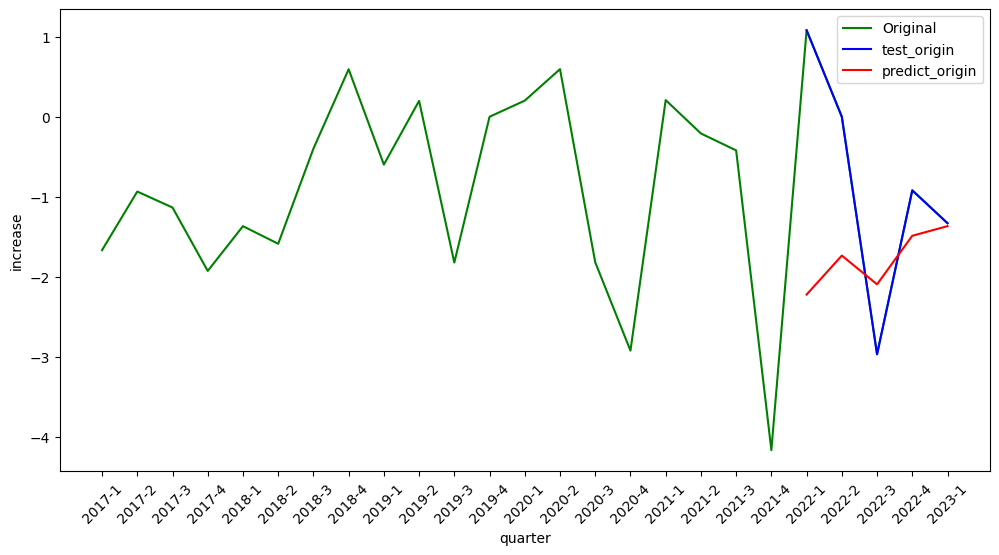

In [2491]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [2492]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.953911
std      1.617460
min     -0.873798
25%      0.036795
50%      0.567503
75%      1.734843
max      3.304211
dtype: float64

In [2493]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 26ms/step
[[0.53463864]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.3603923320770264 


### 추가


In [2494]:
sin_kfood.loc[25] = ['2023-2', '한식음식점', sales, growth, increase, marketability]

<ipython-input-2494-e7b07e3b51a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_kfood.loc[25] = ['2023-2', '한식음식점', sales, growth, increase, marketability]


In [2495]:
sin_kfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한식음식점,3.497433e+10,1.000000,-1.666667,9.888987e+06
1,2017-2,한식음식점,3.582125e+10,1.024216,-0.934579,8.089225e+06
2,2017-3,한식음식점,3.437236e+10,0.959552,-1.134216,8.228848e+06
3,2017-4,한식음식점,3.719008e+10,1.081976,-1.926782,1.281840e+07
4,2018-1,한식음식점,3.486648e+10,0.937521,-1.367188,1.219852e+07
5,2018-2,한식음식점,3.726813e+10,1.068881,-1.587302,1.164436e+07
6,2018-3,한식음식점,3.500703e+10,0.939329,-0.398406,9.084005e+06
7,2018-4,한식음식점,3.884403e+10,1.109607,0.594059,1.166196e+07
8,2019-1,한식음식점,3.083238e+10,0.793748,-0.597610,7.480764e+06
9,2019-2,한식음식점,2.806542e+10,0.910258,0.198807,2.465817e+06


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [2496]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_kfood[['성장성', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  9.888987e+06 -1.666667
1   1.024216  8.089225e+06 -0.934579
2   0.959552  8.228848e+06 -1.134216
3   1.081976  1.281840e+07 -1.926782
4   0.937521  1.219852e+07 -1.367188
5   1.068881  1.164436e+07 -1.587302
6   0.939329  9.084005e+06 -0.398406
7   1.109607  1.166196e+07  0.594059
8   0.793748  7.480764e+06 -0.597610
9   0.910258  2.465817e+06  0.198807
10  1.020132  2.391899e+06 -1.821862
11  1.229773  8.391643e+06  0.000000
12  0.688926  1.194518e+06  0.202020
13  0.926429 -4.465314e+06  0.595238
14  0.932056 -3.148021e+06 -1.818182
15  0.893598 -2.674388e+06 -2.922756
16  0.849551 -3.723169e+06  0.208333
17  1.253011 -4.116171e+06 -0.208768
18  0.848968 -3.361714e+06 -0.420168
19  1.343593  1.243884e+06 -4.166667
20  0.796924 -1.357481e+06  1.082251
21  1.395605 -1.210761e+06  0.000000
22  0.994572  7.241517e+05 -2.968037
23  1.178176  4.061459e+06 -0.919540
24  0.883018 -2.864000e+06 -1.330072
25  0.953536 -2.210832e+06 -1.360392
-

In [2497]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [2498]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.27465393 0.09264875 0.54041507]
 [0.37444152 0.13043971 0.53463866]]


In [2499]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2500]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_358 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_359 (LSTM)             (None, 32)                12416     
                                                                 
 dense_179 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2501]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6620
Epoch 1: val_loss improved from inf to 0.03670, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.6620 - val_loss: 0.0367
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6403
Epoch 2: val_loss improved from 0.03670 to 0.03334, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.6403 - val_loss: 0.0333
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6194
Epoch 3: val_loss improved from 0.03334 to 0.03023, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.6194 - val_loss: 0.0302
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5992
Epoch 4: val_loss improved from 0.03023 to 0.02734, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.5992 - val_loss: 0.0273
Epoch 5/100
1/1 [=================

In [2502]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 805ms/step
[[0.16448183]
 [0.19541909]
 [0.18389653]
 [0.16397767]
 [0.18192   ]]


In [2503]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.408625,0.164482
2022-3,0.402645,0.195419
2022-4,0.597868,0.183897
2023-1,0.177134,0.163978
2023-2,0.212706,0.181920


In [2504]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_kfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.408625,0.164482,2.527582e+10,1.967432e+10,5.601495e+09
2022-3,0.402645,0.195419,2.513861e+10,2.038413e+10,4.754481e+09
2022-4,0.597868,0.183897,2.961772e+10,2.011977e+10,9.497957e+09
2023-1,0.177134,0.163978,1.996462e+10,1.966276e+10,3.018629e+08
2023-2,0.212706,0.181920,2.078076e+10,2.007442e+10,7.063429e+08


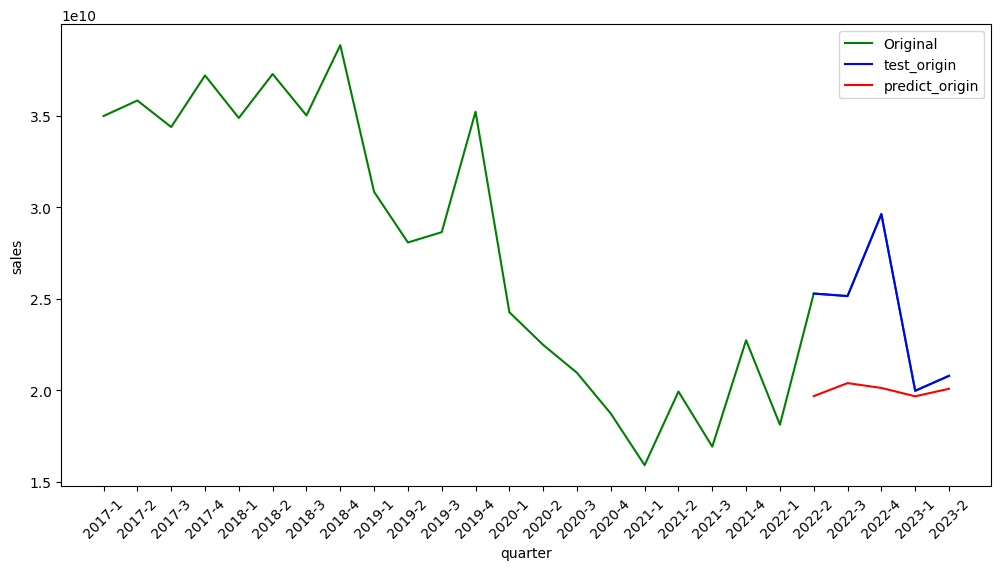

In [2505]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [2506]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     4.172428e+09
std      3.799253e+09
min      3.018629e+08
25%      7.063429e+08
50%      4.754481e+09
75%      5.601495e+09
max      9.497957e+09
dtype: float64

In [2507]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 27ms/step
[[0.15381536]]
--------------------------------------------------------------------------------
예측된 매출  : 19429599232.0 


### 성장성

In [2508]:
X = sin_kfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.497433e+10  9.888987e+06 -1.666667
1   3.582125e+10  8.089225e+06 -0.934579
2   3.437236e+10  8.228848e+06 -1.134216
3   3.719008e+10  1.281840e+07 -1.926782
4   3.486648e+10  1.219852e+07 -1.367188
5   3.726813e+10  1.164436e+07 -1.587302
6   3.500703e+10  9.084005e+06 -0.398406
7   3.884403e+10  1.166196e+07  0.594059
8   3.083238e+10  7.480764e+06 -0.597610
9   2.806542e+10  2.465817e+06  0.198807
10  2.863045e+10  2.391899e+06 -1.821862
11  3.520895e+10  8.391643e+06  0.000000
12  2.425637e+10  1.194518e+06  0.202020
13  2.247180e+10 -4.465314e+06  0.595238
14  2.094498e+10 -3.148021e+06 -1.818182
15  1.871640e+10 -2.674388e+06 -2.922756
16  1.590054e+10 -3.723169e+06  0.208333
17  1.992355e+10 -4.116171e+06 -0.208768
18  1.691447e+10 -3.361714e+06 -0.420168
19  2.272617e+10  1.243884e+06 -4.166667
20  1.811102e+10 -1.357481e+06  1.082251
21  2.527582e+10 -1.210761e+06  0.000000
22  2.513861e+10  7.241517e+05 -2.968037
23  2.961772e+10

In [2509]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [2510]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.17713447 0.09264875 0.54041507]
 [0.21270622 0.13043971 0.53463866]]


In [2511]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2512]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_180"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_360 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_361 (LSTM)             (None, 32)                12416     
                                                                 
 dense_180 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2513]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2414
Epoch 1: val_loss improved from inf to 0.24467, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.2414 - val_loss: 0.2447
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2281
Epoch 2: val_loss improved from 0.24467 to 0.23671, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2281 - val_loss: 0.2367
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2155
Epoch 3: val_loss improved from 0.23671 to 0.22905, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2155 - val_loss: 0.2291
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2035
Epoch 4: val_loss improved from 0.22905 to 0.22166, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2035 - val_loss: 0.2217
Epoch 5/100
1/1 [=================

In [2514]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 835ms/step
[[0.28878406]
 [0.3710026 ]
 [0.35017705]
 [0.33674744]
 [0.3718763 ]]


In [2515]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.288784
2022-3,0.432510,0.371003
2022-4,0.692324,0.350177
2023-1,0.274654,0.336747
2023-2,0.374442,0.371876


In [2516]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 3].values       # 성장성이 sin_kfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.288784,1.395605,0.893004,0.502601
2022-3,0.432510,0.371003,0.994572,0.951106,0.043466
2022-4,0.692324,0.350177,1.178176,0.936389,0.241788
2023-1,0.274654,0.336747,0.883018,0.926898,-0.043880
2023-2,0.374442,0.371876,0.953536,0.951723,0.001813


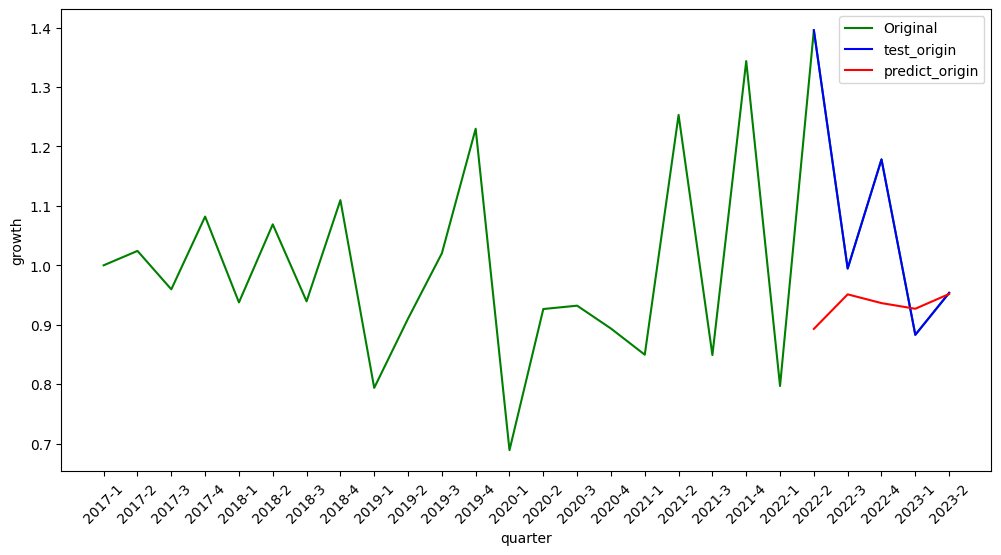

In [2517]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [2518]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.149157
std      0.225636
min     -0.043880
25%      0.001813
50%      0.043466
75%      0.241788
max      0.502601
dtype: float64

In [2519]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 24ms/step
[[0.29469478]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8971806764602661 


### 시장성

In [2520]:
### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_kfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.497433e+10  1.000000 -1.666667
1   3.582125e+10  1.024216 -0.934579
2   3.437236e+10  0.959552 -1.134216
3   3.719008e+10  1.081976 -1.926782
4   3.486648e+10  0.937521 -1.367188
5   3.726813e+10  1.068881 -1.587302
6   3.500703e+10  0.939329 -0.398406
7   3.884403e+10  1.109607  0.594059
8   3.083238e+10  0.793748 -0.597610
9   2.806542e+10  0.910258  0.198807
10  2.863045e+10  1.020132 -1.821862
11  3.520895e+10  1.229773  0.000000
12  2.425637e+10  0.688926  0.202020
13  2.247180e+10  0.926429  0.595238
14  2.094498e+10  0.932056 -1.818182
15  1.871640e+10  0.893598 -2.922756
16  1.590054e+10  0.849551  0.208333
17  1.992355e+10  1.253011 -0.208768
18  1.691447e+10  0.848968 -0.420168
19  2.272617e+10  1.343593 -4.166667
20  1.811102e+10  0.796924  1.082251
21  2.527582e+10  1.395605  0.000000
22  2.513861e+10  0.994572 -2.968037
23  2.961772e+10  1.178176 -0.919540
24  1.996462e+10  0.883018 -1.330072
25  2.078076e+10  0.953536 -1.360392
-

In [2521]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [2522]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.17713447 0.27465393 0.54041507]
 [0.21270622 0.37444152 0.53463866]]


In [2523]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2524]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_362 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_363 (LSTM)             (None, 32)                12416     
                                                                 
 dense_181 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2525]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6133
Epoch 1: val_loss improved from inf to 0.02389, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.6133 - val_loss: 0.0239
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5929
Epoch 2: val_loss improved from 0.02389 to 0.02156, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.5929 - val_loss: 0.0216
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5731
Epoch 3: val_loss improved from 0.02156 to 0.01948, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.5731 - val_loss: 0.0195
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5539
Epoch 4: val_loss improved from 0.01948 to 0.01763, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.5539 - val_loss: 0.0176
Epoch 5/100
1/1 [=================

In [2526]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 874ms/step
[[0.08429103]
 [0.10499769]
 [0.10053933]
 [0.09525421]
 [0.10373806]]


In [2527]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.188302,0.084291
2022-3,0.300252,0.104998
2022-4,0.493341,0.100539
2023-1,0.092649,0.095254
2023-2,0.130440,0.103738


In [2528]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 5].values       # 시장성이 sin_kfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.188302,0.084291,-1.210761e+06,-3008452.0,1.797691e+06
2022-3,0.300252,0.104998,7.241517e+05,-2650564.0,3.374716e+06
2022-4,0.493341,0.100539,4.061459e+06,-2727621.0,6.789080e+06
2023-1,0.092649,0.095254,-2.864000e+06,-2818967.5,-4.503200e+04
2023-2,0.130440,0.103738,-2.210832e+06,-2672335.0,4.615035e+05


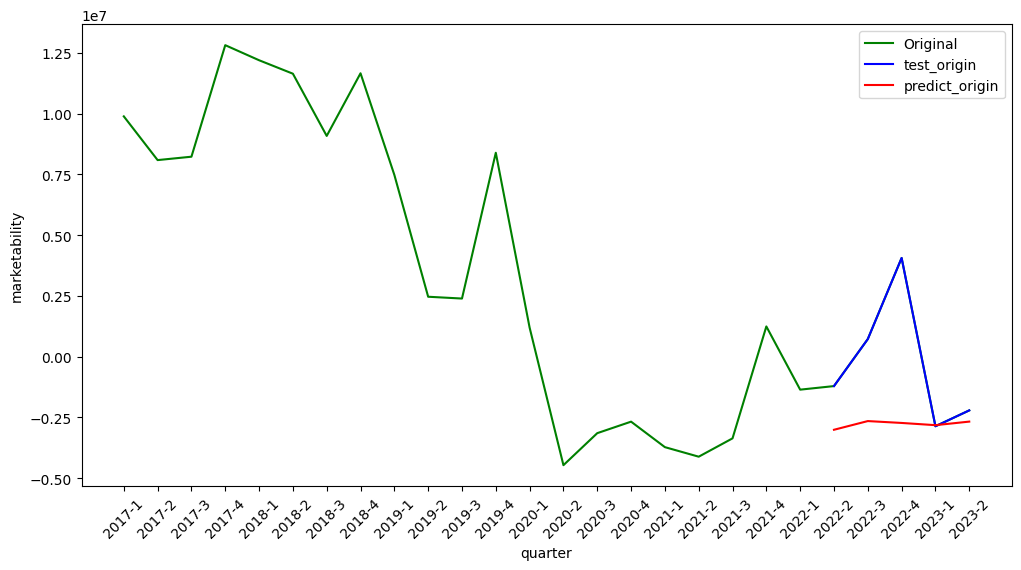

In [2529]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [2530]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     2.475592e+06
std      2.751556e+06
min     -4.503200e+04
25%      4.615035e+05
50%      1.797691e+06
75%      3.374716e+06
max      6.789080e+06
dtype: float64

In [2531]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 26ms/step
[[0.08857521]]
--------------------------------------------------------------------------------
예측된 시장성  : -2934405.5 


### 순점포증감률

In [2532]:
### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '성장성', '시장성']]
y = sin_kfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.497433e+10  1.000000  9.888987e+06
1   3.582125e+10  1.024216  8.089225e+06
2   3.437236e+10  0.959552  8.228848e+06
3   3.719008e+10  1.081976  1.281840e+07
4   3.486648e+10  0.937521  1.219852e+07
5   3.726813e+10  1.068881  1.164436e+07
6   3.500703e+10  0.939329  9.084005e+06
7   3.884403e+10  1.109607  1.166196e+07
8   3.083238e+10  0.793748  7.480764e+06
9   2.806542e+10  0.910258  2.465817e+06
10  2.863045e+10  1.020132  2.391899e+06
11  3.520895e+10  1.229773  8.391643e+06
12  2.425637e+10  0.688926  1.194518e+06
13  2.247180e+10  0.926429 -4.465314e+06
14  2.094498e+10  0.932056 -3.148021e+06
15  1.871640e+10  0.893598 -2.674388e+06
16  1.590054e+10  0.849551 -3.723169e+06
17  1.992355e+10  1.253011 -4.116171e+06
18  1.691447e+10  0.848968 -3.361714e+06
19  2.272617e+10  1.343593  1.243884e+06
20  1.811102e+10  0.796924 -1.357481e+06
21  2.527582e+10  1.395605 -1.210761e+06
22  2.513861e+10  0.994572  7.241517e+05
23  2.961772e+10

In [2533]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [2534]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.17713447 0.27465393 0.09264875]
 [0.21270622 0.37444152 0.13043971]]


In [2535]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2536]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_182"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_364 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_365 (LSTM)             (None, 32)                12416     
                                                                 
 dense_182 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2537]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5001
Epoch 1: val_loss improved from inf to 0.49449, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.5001 - val_loss: 0.4945
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4805
Epoch 2: val_loss improved from 0.49449 to 0.48372, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.4805 - val_loss: 0.4837
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4614
Epoch 3: val_loss improved from 0.48372 to 0.47323, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.4614 - val_loss: 0.4732
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4429
Epoch 4: val_loss improved from 0.47323 to 0.46296, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.4429 - val_loss: 0.4630
Epoch 5/100
1/1 [=================

In [2538]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 868ms/step
[[0.48271778]
 [0.4103103 ]
 [0.53329563]
 [0.55342937]
 [0.55523443]]


In [2539]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.793814,0.482718
2022-3,0.228358,0.410310
2022-4,0.618628,0.533296
2023-1,0.540415,0.553429
2023-2,0.534639,0.555234


In [2540]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_kfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.793814,0.482718,0.000000,-1.632921,1.632921
2022-3,0.228358,0.410310,-2.968037,-2.012982,-0.955055
2022-4,0.618628,0.533296,-0.919540,-1.367442,0.447901
2023-1,0.540415,0.553429,-1.330072,-1.261761,-0.068311
2023-2,0.534639,0.555234,-1.360392,-1.252287,-0.108106


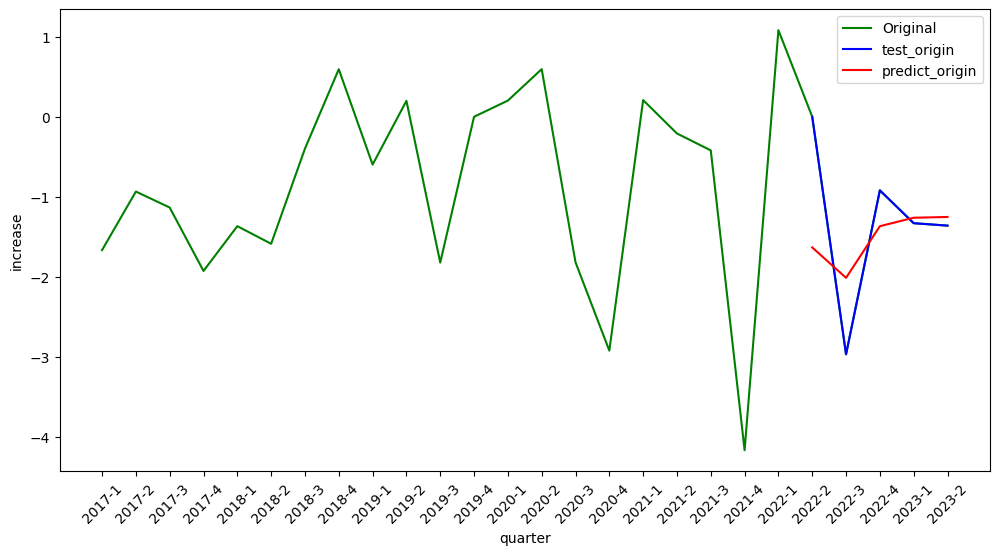

In [2541]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [2542]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.189870
std      0.950694
min     -0.955055
25%     -0.108106
50%     -0.068311
75%      0.447901
max      1.632921
dtype: float64

In [2543]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 26ms/step
[[0.36745244]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.23793888092041 


### 추가

In [2544]:
sin_kfood.loc[26] = ['2023-3', '한식음식점', sales, growth, increase, marketability]

<ipython-input-2544-e11ff2411f9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_kfood.loc[26] = ['2023-3', '한식음식점', sales, growth, increase, marketability]


In [2545]:
sin_kfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한식음식점,3.497433e+10,1.000000,-1.666667,9.888987e+06
1,2017-2,한식음식점,3.582125e+10,1.024216,-0.934579,8.089225e+06
2,2017-3,한식음식점,3.437236e+10,0.959552,-1.134216,8.228848e+06
3,2017-4,한식음식점,3.719008e+10,1.081976,-1.926782,1.281840e+07
4,2018-1,한식음식점,3.486648e+10,0.937521,-1.367188,1.219852e+07
5,2018-2,한식음식점,3.726813e+10,1.068881,-1.587302,1.164436e+07
6,2018-3,한식음식점,3.500703e+10,0.939329,-0.398406,9.084005e+06
7,2018-4,한식음식점,3.884403e+10,1.109607,0.594059,1.166196e+07
8,2019-1,한식음식점,3.083238e+10,0.793748,-0.597610,7.480764e+06
9,2019-2,한식음식점,2.806542e+10,0.910258,0.198807,2.465817e+06


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [2546]:
### X / y 데이터 생성
X = sin_kfood[['성장성', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  9.888987e+06 -1.666667
1   1.024216  8.089225e+06 -0.934579
2   0.959552  8.228848e+06 -1.134216
3   1.081976  1.281840e+07 -1.926782
4   0.937521  1.219852e+07 -1.367188
5   1.068881  1.164436e+07 -1.587302
6   0.939329  9.084005e+06 -0.398406
7   1.109607  1.166196e+07  0.594059
8   0.793748  7.480764e+06 -0.597610
9   0.910258  2.465817e+06  0.198807
10  1.020132  2.391899e+06 -1.821862
11  1.229773  8.391643e+06  0.000000
12  0.688926  1.194518e+06  0.202020
13  0.926429 -4.465314e+06  0.595238
14  0.932056 -3.148021e+06 -1.818182
15  0.893598 -2.674388e+06 -2.922756
16  0.849551 -3.723169e+06  0.208333
17  1.253011 -4.116171e+06 -0.208768
18  0.848968 -3.361714e+06 -0.420168
19  1.343593  1.243884e+06 -4.166667
20  0.796924 -1.357481e+06  1.082251
21  1.395605 -1.210761e+06  0.000000
22  0.994572  7.241517e+05 -2.968037
23  1.178176  4.061459e+06 -0.919540
24  0.883018 -2.864000e+06 -1.330072
25  0.953536 -2.210832e+06 -1.360392
2

In [2547]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [2548]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.37444152 0.13043971 0.53463866]
 [0.29469476 0.08857521 0.36745247]]


In [2549]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2550]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_183"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_366 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_367 (LSTM)             (None, 32)                12416     
                                                                 
 dense_183 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2551]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6153
Epoch 1: val_loss improved from inf to 0.04672, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.6153 - val_loss: 0.0467
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5948
Epoch 2: val_loss improved from 0.04672 to 0.04330, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.5948 - val_loss: 0.0433
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5749
Epoch 3: val_loss improved from 0.04330 to 0.04012, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.5749 - val_loss: 0.0401
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5558
Epoch 4: val_loss improved from 0.04012 to 0.03713, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.5558 - val_loss: 0.0371
Epoch 5/100
1/1 [=================

In [2552]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 836ms/step
[[0.21261433]
 [0.20045069]
 [0.17810374]
 [0.19792388]
 [0.166695  ]]


In [2553]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.402645,0.212614
2022-4,0.597868,0.200451
2023-1,0.177134,0.178104
2023-2,0.212706,0.197924
2023-3,0.153815,0.166695


In [2554]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_kfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.402645,0.212614,2.513861e+10,2.077865e+10,4.359961e+09
2022-4,0.597868,0.200451,2.961772e+10,2.049958e+10,9.118147e+09
2023-1,0.177134,0.178104,1.996462e+10,1.998686e+10,-2.223923e+07
2023-2,0.212706,0.197924,2.078076e+10,2.044160e+10,3.391590e+08
2023-3,0.153815,0.166695,1.942960e+10,1.972510e+10,-2.955039e+08


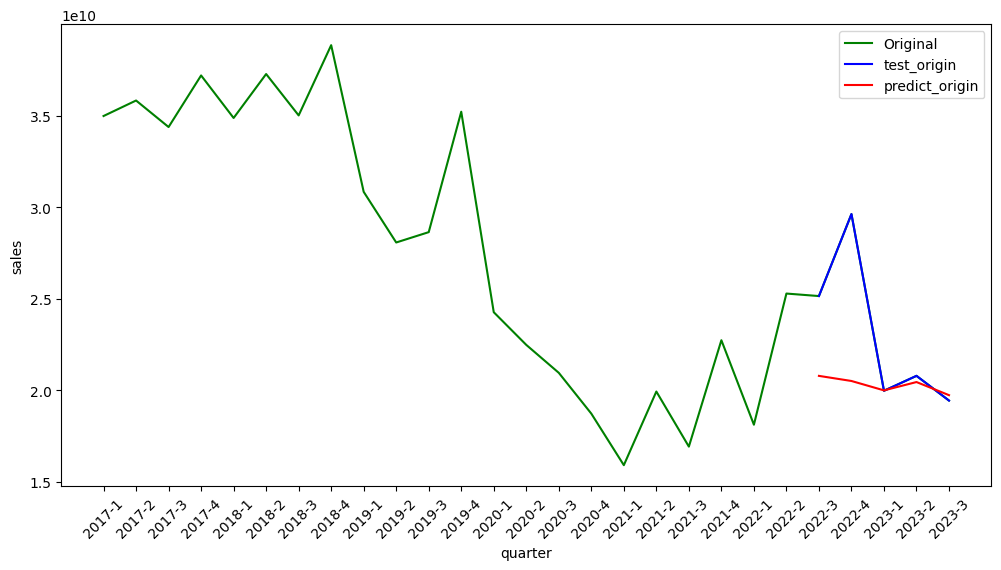

In [2555]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [2556]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     2.699905e+09
std      4.059104e+09
min     -2.955039e+08
25%     -2.223923e+07
50%      3.391590e+08
75%      4.359961e+09
max      9.118147e+09
dtype: float64

In [2557]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.16312113]]
--------------------------------------------------------------------------------
예측된 매출  : 19643107328.0 


### 성장성

In [2558]:
X = sin_kfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.497433e+10  9.888987e+06 -1.666667
1   3.582125e+10  8.089225e+06 -0.934579
2   3.437236e+10  8.228848e+06 -1.134216
3   3.719008e+10  1.281840e+07 -1.926782
4   3.486648e+10  1.219852e+07 -1.367188
5   3.726813e+10  1.164436e+07 -1.587302
6   3.500703e+10  9.084005e+06 -0.398406
7   3.884403e+10  1.166196e+07  0.594059
8   3.083238e+10  7.480764e+06 -0.597610
9   2.806542e+10  2.465817e+06  0.198807
10  2.863045e+10  2.391899e+06 -1.821862
11  3.520895e+10  8.391643e+06  0.000000
12  2.425637e+10  1.194518e+06  0.202020
13  2.247180e+10 -4.465314e+06  0.595238
14  2.094498e+10 -3.148021e+06 -1.818182
15  1.871640e+10 -2.674388e+06 -2.922756
16  1.590054e+10 -3.723169e+06  0.208333
17  1.992355e+10 -4.116171e+06 -0.208768
18  1.691447e+10 -3.361714e+06 -0.420168
19  2.272617e+10  1.243884e+06 -4.166667
20  1.811102e+10 -1.357481e+06  1.082251
21  2.527582e+10 -1.210761e+06  0.000000
22  2.513861e+10  7.241517e+05 -2.968037
23  2.961772e+10

In [2559]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [2560]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.21270622 0.13043971 0.53463866]
 [0.15381538 0.08857521 0.36745247]]


In [2561]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2562]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_184"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_368 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_369 (LSTM)             (None, 32)                12416     
                                                                 
 dense_184 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2563]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2327
Epoch 1: val_loss improved from inf to 0.35545, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2327 - val_loss: 0.3554
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2196
Epoch 2: val_loss improved from 0.35545 to 0.34646, saving model to stock_model.h5
1/1 [==============================] - 0s 148ms/step - loss: 0.2196 - val_loss: 0.3465
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2072
Epoch 3: val_loss improved from 0.34646 to 0.33774, saving model to stock_model.h5
1/1 [==============================] - 0s 136ms/step - loss: 0.2072 - val_loss: 0.3377
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1954
Epoch 4: val_loss improved from 0.33774 to 0.32927, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.1954 - val_loss: 0.3293
Epoch 5/100
1/1 [==============

In [2564]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 842ms/step
[[0.36751685]
 [0.34664047]
 [0.3332147 ]
 [0.36806512]
 [0.2916741 ]]


In [2565]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.432510,0.367517
2022-4,0.692324,0.346640
2023-1,0.274654,0.333215
2023-2,0.374442,0.368065
2023-3,0.294695,0.291674


In [2566]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 3].values       # 성장성이 sin_kfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.432510,0.367517,0.994572,0.948642,0.045929
2022-4,0.692324,0.346640,1.178176,0.933890,0.244287
2023-1,0.274654,0.333215,0.883018,0.924402,-0.041384
2023-2,0.374442,0.368065,0.953536,0.949030,0.004506
2023-3,0.294695,0.291674,0.897181,0.895046,0.002135


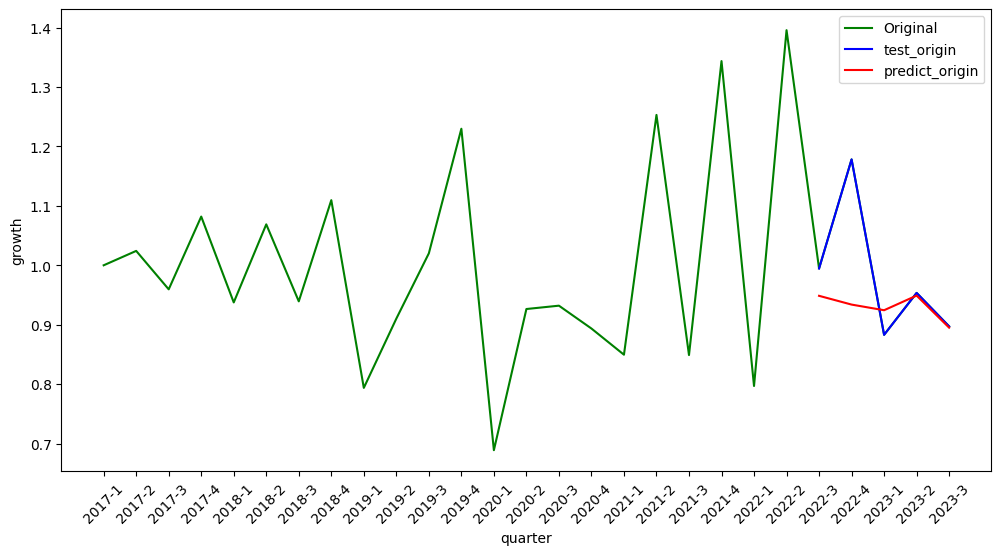

In [2567]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [2568]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.051095
std      0.112327
min     -0.041384
25%      0.002135
50%      0.004506
75%      0.045929
max      0.244287
dtype: float64

In [2569]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 27ms/step
[[0.28292856]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8888657689094543 


###시장성

In [2570]:
### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_kfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.497433e+10  1.000000 -1.666667
1   3.582125e+10  1.024216 -0.934579
2   3.437236e+10  0.959552 -1.134216
3   3.719008e+10  1.081976 -1.926782
4   3.486648e+10  0.937521 -1.367188
5   3.726813e+10  1.068881 -1.587302
6   3.500703e+10  0.939329 -0.398406
7   3.884403e+10  1.109607  0.594059
8   3.083238e+10  0.793748 -0.597610
9   2.806542e+10  0.910258  0.198807
10  2.863045e+10  1.020132 -1.821862
11  3.520895e+10  1.229773  0.000000
12  2.425637e+10  0.688926  0.202020
13  2.247180e+10  0.926429  0.595238
14  2.094498e+10  0.932056 -1.818182
15  1.871640e+10  0.893598 -2.922756
16  1.590054e+10  0.849551  0.208333
17  1.992355e+10  1.253011 -0.208768
18  1.691447e+10  0.848968 -0.420168
19  2.272617e+10  1.343593 -4.166667
20  1.811102e+10  0.796924  1.082251
21  2.527582e+10  1.395605  0.000000
22  2.513861e+10  0.994572 -2.968037
23  2.961772e+10  1.178176 -0.919540
24  1.996462e+10  0.883018 -1.330072
25  2.078076e+10  0.953536 -1.360392
2

In [2571]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [2572]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.21270622 0.37444152 0.53463866]
 [0.15381538 0.29469476 0.36745247]]


In [2573]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2574]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_370 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_371 (LSTM)             (None, 32)                12416     
                                                                 
 dense_185 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2575]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5623
Epoch 1: val_loss improved from inf to 0.02923, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.5623 - val_loss: 0.0292
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5435
Epoch 2: val_loss improved from 0.02923 to 0.02641, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.5435 - val_loss: 0.0264
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5254
Epoch 3: val_loss improved from 0.02641 to 0.02382, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.5254 - val_loss: 0.0238
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5078
Epoch 4: val_loss improved from 0.02382 to 0.02145, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.5078 - val_loss: 0.0214
Epoch 5/100
1/1 [=================

In [2576]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 837ms/step
[[0.14670509]
 [0.14342237]
 [0.13307221]
 [0.1449259 ]
 [0.1217812 ]]


In [2577]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.300252,0.146705
2022-4,0.493341,0.143422
2023-1,0.092649,0.133072
2023-2,0.130440,0.144926
2023-3,0.088575,0.121781


In [2578]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 5].values       # 시장성이 sin_kfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.300252,0.146705,7.241517e+05,-1929705.250,2.653857e+06
2022-4,0.493341,0.143422,4.061459e+06,-1986442.875,6.047902e+06
2023-1,0.092649,0.133072,-2.864000e+06,-2165332.000,-6.986675e+05
2023-2,0.130440,0.144926,-2.210832e+06,-1960456.125,-2.503754e+05
2023-3,0.088575,0.121781,-2.934406e+06,-2360482.750,-5.739228e+05


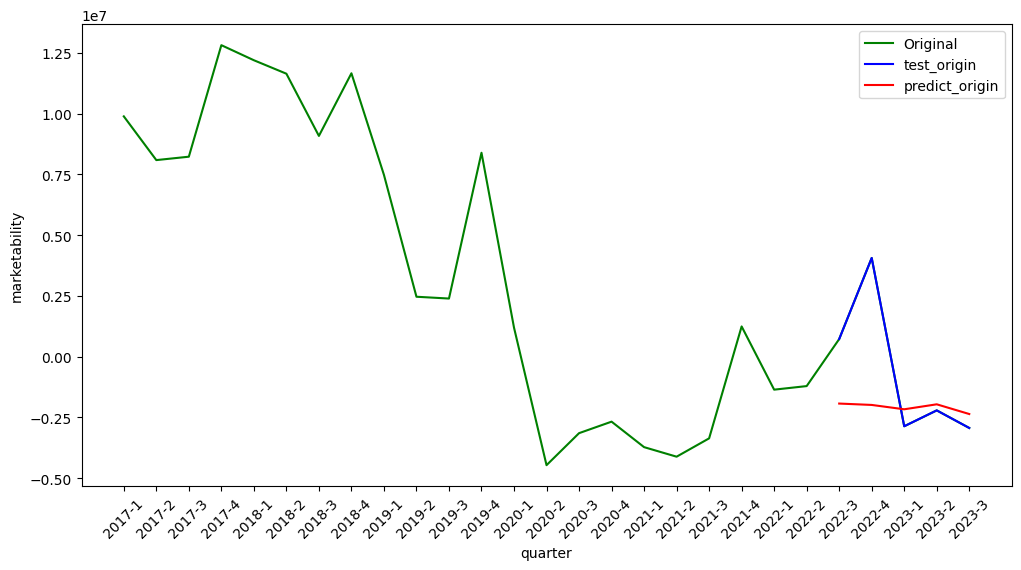

In [2579]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [2580]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     1.435759e+06
std      2.923751e+06
min     -6.986675e+05
25%     -5.739228e+05
50%     -2.503754e+05
75%      2.653857e+06
max      6.047902e+06
dtype: float64

In [2581]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.11829248]]
--------------------------------------------------------------------------------
예측된 시장성  : -2420780.75 


### 순점포증감률

In [2582]:
### X / y 데이터 생성
X = sin_kfood[['분기당_매출_금액', '성장성', '시장성']]
y = sin_kfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.497433e+10  1.000000  9.888987e+06
1   3.582125e+10  1.024216  8.089225e+06
2   3.437236e+10  0.959552  8.228848e+06
3   3.719008e+10  1.081976  1.281840e+07
4   3.486648e+10  0.937521  1.219852e+07
5   3.726813e+10  1.068881  1.164436e+07
6   3.500703e+10  0.939329  9.084005e+06
7   3.884403e+10  1.109607  1.166196e+07
8   3.083238e+10  0.793748  7.480764e+06
9   2.806542e+10  0.910258  2.465817e+06
10  2.863045e+10  1.020132  2.391899e+06
11  3.520895e+10  1.229773  8.391643e+06
12  2.425637e+10  0.688926  1.194518e+06
13  2.247180e+10  0.926429 -4.465314e+06
14  2.094498e+10  0.932056 -3.148021e+06
15  1.871640e+10  0.893598 -2.674388e+06
16  1.590054e+10  0.849551 -3.723169e+06
17  1.992355e+10  1.253011 -4.116171e+06
18  1.691447e+10  0.848968 -3.361714e+06
19  2.272617e+10  1.343593  1.243884e+06
20  1.811102e+10  0.796924 -1.357481e+06
21  2.527582e+10  1.395605 -1.210761e+06
22  2.513861e+10  0.994572  7.241517e+05
23  2.961772e+10

In [2583]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [2584]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.21270622 0.37444152 0.13043971]
 [0.15381538 0.29469476 0.08857521]]


In [2585]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2586]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_372 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_373 (LSTM)             (None, 32)                12416     
                                                                 
 dense_186 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2587]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5314
Epoch 1: val_loss improved from inf to 0.47075, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5314 - val_loss: 0.4707
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5113
Epoch 2: val_loss improved from 0.47075 to 0.46089, saving model to stock_model.h5
1/1 [==============================] - 0s 143ms/step - loss: 0.5113 - val_loss: 0.4609
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4919
Epoch 3: val_loss improved from 0.46089 to 0.45129, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.4919 - val_loss: 0.4513
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4730
Epoch 4: val_loss improved from 0.45129 to 0.44192, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.4730 - val_loss: 0.4419
Epoch 5/100
1/1 [===============

In [2588]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.4255268 ]
 [0.55674636]
 [0.57523996]
 [0.57861924]
 [0.38104606]]


In [2589]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.228358,0.425527
2022-4,0.618628,0.556746
2023-1,0.540415,0.575240
2023-2,0.534639,0.578619
2023-3,0.367452,0.381046


In [2590]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_kfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.228358,0.425527,-2.968037,-1.933111,-1.034925
2022-4,0.618628,0.556746,-0.919540,-1.244351,0.324811
2023-1,0.540415,0.575240,-1.330072,-1.147280,-0.182793
2023-2,0.534639,0.578619,-1.360392,-1.129542,-0.230850
2023-3,0.367452,0.381046,-2.237939,-2.166587,-0.071352


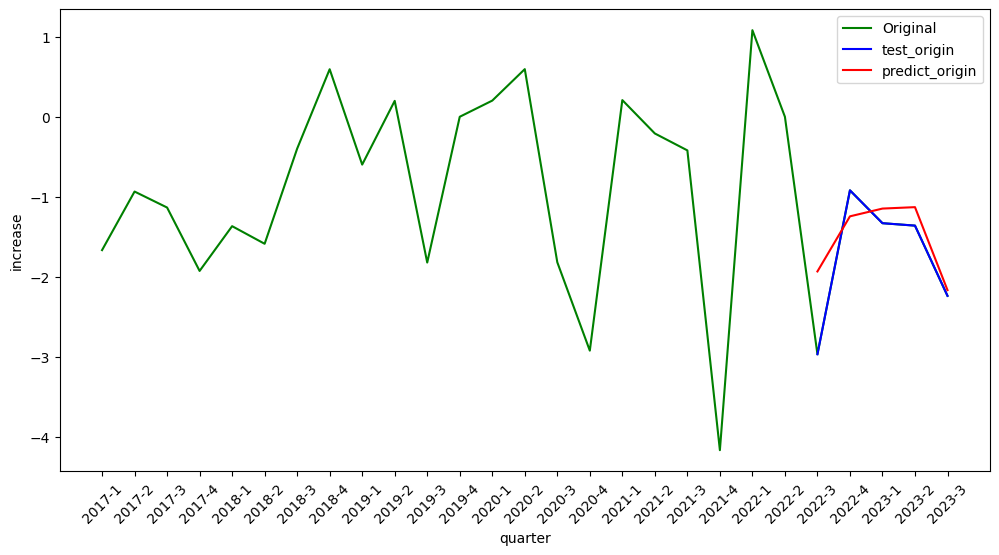

In [2591]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [2592]:
### error의 요약 통계량
error.describe()

count    5.000000
mean    -0.239022
std      0.495659
min     -1.034925
25%     -0.230850
50%     -0.182793
75%     -0.071352
max      0.324811
dtype: float64

In [2593]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 27ms/step
[[0.39197773]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.10920786857605 


### 추가

In [2594]:
sin_kfood.loc[27] = ['2023-4', '한식음식점', sales, growth, increase, marketability]

<ipython-input-2594-d9291122052a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_kfood.loc[27] = ['2023-4', '한식음식점', sales, growth, increase, marketability]


In [2595]:
final_sin_kfood = sin_kfood
final_sin_kfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,한식음식점,3.497433e+10,1.000000,-1.666667,9.888987e+06
1,2017-2,한식음식점,3.582125e+10,1.024216,-0.934579,8.089225e+06
2,2017-3,한식음식점,3.437236e+10,0.959552,-1.134216,8.228848e+06
3,2017-4,한식음식점,3.719008e+10,1.081976,-1.926782,1.281840e+07
4,2018-1,한식음식점,3.486648e+10,0.937521,-1.367188,1.219852e+07
5,2018-2,한식음식점,3.726813e+10,1.068881,-1.587302,1.164436e+07
6,2018-3,한식음식점,3.500703e+10,0.939329,-0.398406,9.084005e+06
7,2018-4,한식음식점,3.884403e+10,1.109607,0.594059,1.166196e+07
8,2019-1,한식음식점,3.083238e+10,0.793748,-0.597610,7.480764e+06
9,2019-2,한식음식점,2.806542e+10,0.910258,0.198807,2.465817e+06


## 최종결과

In [2596]:
### X / y 데이터 생성
X = sin_kfood[['성장성', '시장성', '순점포증감률']]
y = sin_kfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  9.888987e+06 -1.666667
1   1.024216  8.089225e+06 -0.934579
2   0.959552  8.228848e+06 -1.134216
3   1.081976  1.281840e+07 -1.926782
4   0.937521  1.219852e+07 -1.367188
5   1.068881  1.164436e+07 -1.587302
6   0.939329  9.084005e+06 -0.398406
7   1.109607  1.166196e+07  0.594059
8   0.793748  7.480764e+06 -0.597610
9   0.910258  2.465817e+06  0.198807
10  1.020132  2.391899e+06 -1.821862
11  1.229773  8.391643e+06  0.000000
12  0.688926  1.194518e+06  0.202020
13  0.926429 -4.465314e+06  0.595238
14  0.932056 -3.148021e+06 -1.818182
15  0.893598 -2.674388e+06 -2.922756
16  0.849551 -3.723169e+06  0.208333
17  1.253011 -4.116171e+06 -0.208768
18  0.848968 -3.361714e+06 -0.420168
19  1.343593  1.243884e+06 -4.166667
20  0.796924 -1.357481e+06  1.082251
21  1.395605 -1.210761e+06  0.000000
22  0.994572  7.241517e+05 -2.968037
23  1.178176  4.061459e+06 -0.919540
24  0.883018 -2.864000e+06 -1.330072
25  0.953536 -2.210832e+06 -1.360392
2

In [2597]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [2598]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.29469476 0.08857521 0.36745247]
 [0.28292858 0.11829247 0.39197772]]


In [2599]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [2600]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_374 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_375 (LSTM)             (None, 32)                12416     
                                                                 
 dense_187 (Dense)           (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [2601]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6153
Epoch 1: val_loss improved from inf to 0.06029, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.6153 - val_loss: 0.0603
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5948
Epoch 2: val_loss improved from 0.06029 to 0.05619, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.5948 - val_loss: 0.0562
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5749
Epoch 3: val_loss improved from 0.05619 to 0.05233, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.5749 - val_loss: 0.0523
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5558
Epoch 4: val_loss improved from 0.05233 to 0.04869, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.5558 - val_loss: 0.0487
Epoch 5/100
1/1 [=================

In [2602]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 849ms/step
[[0.23412773]
 [0.2076128 ]
 [0.23114777]
 [0.19303928]
 [0.18900175]]


In [2603]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_kfood.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.597868,0.234128
2023-1,0.177134,0.207613
2023-2,0.212706,0.231148
2023-3,0.153815,0.193039
2023-4,0.163121,0.189002


In [2604]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_kfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_kfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.597868,0.234128,2.961772e+10,2.127225e+10,8.345478e+09
2023-1,0.177134,0.207613,1.996462e+10,2.066390e+10,-6.992794e+08
2023-2,0.212706,0.231148,2.078076e+10,2.120387e+10,-4.231127e+08
2023-3,0.153815,0.193039,1.942960e+10,2.032953e+10,-8.999342e+08
2023-4,0.163121,0.189002,1.964311e+10,2.023690e+10,-5.937910e+08


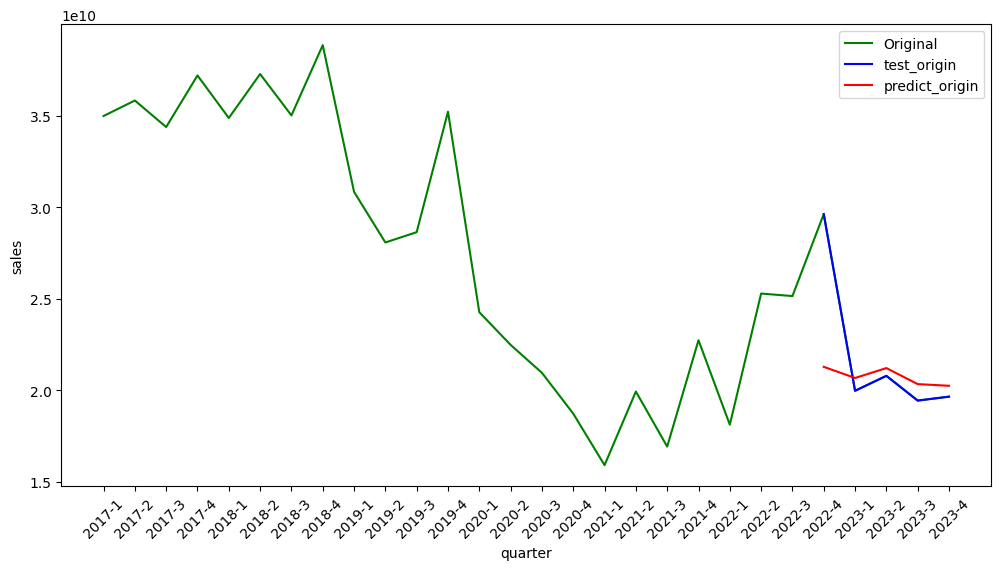

In [2605]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_kfood['분기'], sin_kfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()